In [1]:
%matplotlib inline
import pandas as pd

/Users/BadWizard/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/style/core.py:197: UserWarning: In /Users/BadWizard/.matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
movies = pd.read_csv('movielens/movies.csv')

In [3]:
ratings = pd.read_csv('movielens/ratings.csv')

In [4]:
tags = pd.read_csv('movielens/tags.csv')

In [5]:
del tags['timestamp']
del ratings['timestamp']

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies[['title', 'genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [8]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [9]:
tag_counts =  tags['tag'].value_counts()

In [10]:
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

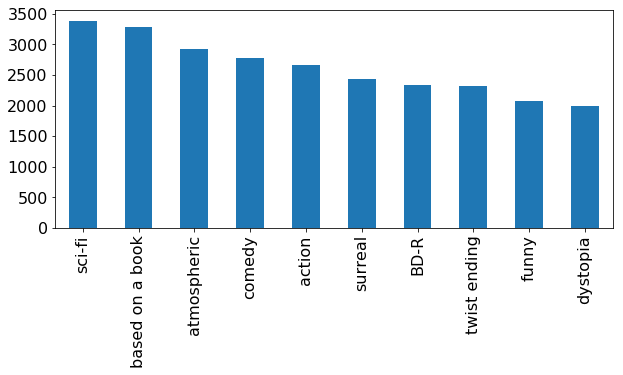

In [11]:
tag_counts[:10].plot('bar', figsize=(10,4), fontsize = 16,secondary_y = False)

In [12]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [13]:
highly_rated = ratings['rating'] >= 4
ratings4 = ratings[highly_rated]
ratings4[30:50]

,userId,movieId,rating
68,1,2021,4.0
69,1,2100,4.0
70,1,2118,4.0
71,1,2138,4.0
72,1,2140,4.0
73,1,2143,4.0
74,1,2173,4.0
75,1,2174,4.0
76,1,2193,4.0
79,1,2288,4.0


In [14]:
movies['genres'].value_counts()

Drama                                                      4520
Comedy                                                     2294
Documentary                                                1942
Comedy|Drama                                               1264
Drama|Romance                                              1075
Comedy|Romance                                              757
Comedy|Drama|Romance                                        605
Horror                                                      565
Crime|Drama                                                 448
Drama|Thriller                                              426
Drama|War                                                   399
Horror|Thriller                                             374
Crime|Drama|Thriller                                        304
Thriller                                                    268
(no genres listed)                                          246
Western                                 

In [15]:
is_animation = movies['genres'].str.startswith("Animation")
is_animation.shape

(27278,)

In [16]:
is_animation = movies['genres'].str.contains("Animation")
is_animation.shape

(27278,)

In [17]:
movies[is_animation][:5]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


In [18]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [19]:
ratings_count = ratings['rating'].value_counts()
ratings_count

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [20]:
ratings_count2 = ratings[['movieId', 'rating']].groupby('rating').count()

In [21]:
ratings_count2

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [22]:
ratings[['movieId', 'rating']].groupby('movieId').count().head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [23]:
ratings[['movieId','rating']].groupby('movieId').mean().head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [24]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [25]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [27]:
pd.merge(movies, tags, left_on='movieId', right_on='movieId').head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [28]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [29]:
av_ratings = ratings.groupby('movieId', as_index=False).mean()

In [30]:
del av_ratings['userId']
av_ratings.head()


,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [31]:
box_office = movies.merge(av_ratings, how='inner', on='movieId')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [32]:
is_higly_rated = box_office['rating'] >=4.0

In [33]:
box_office[is_higly_rated][:5]

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.057546
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
108,110,Braveheart (1995),Action|Drama|War,4.042534


In [111]:
is_comedy = box_office['genres'].str.contains('Comedy')
len(is_comedy)

26744

In [113]:
box_office[is_comedy].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [114]:
mask = is_higly_rated & is_comedy

In [115]:
box_office[mask].head()

,movieId,title,genres,rating
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.035610
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.174231
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.029000
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.112359
